# Logistics回归

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

## 导入数据

In [10]:
data1 = pd.read_table('data/ex2data1.txt',sep=',',header=None)
X = data1.iloc[:,:-1].values
y= data1.iloc[:,-1].values
m = y.size
X = np.insert(X,0,1,axis=1)
y = y.reshape((m,1))


In [15]:
admitted = data1.loc[data1[2]==1]
not_admitted = data1.loc[data1[2]==0]

### 数据可视化

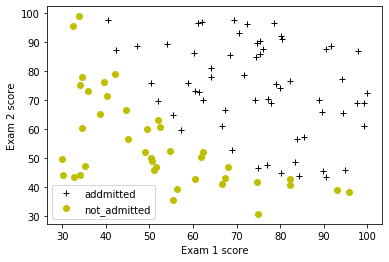

In [16]:
def plotData():
    fig,ax = plt.subplots()
    ax.plot(admitted[0],admitted[1],'k+',label='addmitted')
    ax.plot(not_admitted[0],not_admitted[1],'yo',label='not_admitted')
    plt.legend()
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
plotData()
plt.show()

## 开始

In [18]:
from scipy.special import expit

In [19]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def h(theta,X):
    return expit(np.dot(X,theta))

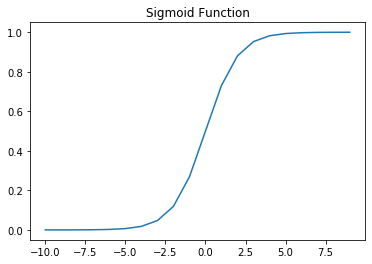

In [20]:
myx = np.arange(-10,10-0.01)
plt.plot(myx,expit(myx))
plt.title('Sigmoid Function')
plt.show()

## 代价函数

In [24]:
def computeCost(mytheta,myX,myy):
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    return float((1./m)*np.sum(term1 - term2))

In [25]:
initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,y)

0.6931471805599453

## 梯度下降

In [26]:
def gradientDescent(theta_star,X,y,alpha=0.001,iterations=1000000):
    theta = theta_star
    jvec = []
    m=y.size
    for i in range(iterations):
        tem_theta = theta
        for j in range(len(theta)):
            tem_theta[j] = theta[j]-(alpha/m)*np.sum(np.dot((h(theta,X).reshape(m,1)-y).T,np.array(X[:,j]).reshape(m,1)))
        theta = tem_theta
        jvec.append(computeCost(theta,X,y))
    return theta,jvec

In [27]:
a,b = gradientDescent(np.zeros((X.shape[1],1)),X,y,0.001,1000000)

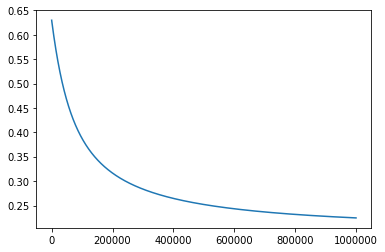

In [28]:
plt.plot(range(1000000),b)
plt.show()

In [29]:
from scipy import optimize

In [30]:
theta = optimize.fmin(computeCost,initial_theta,args=(X,y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [31]:
theta

array([-25.16130062,   0.20623142,   0.20147143])

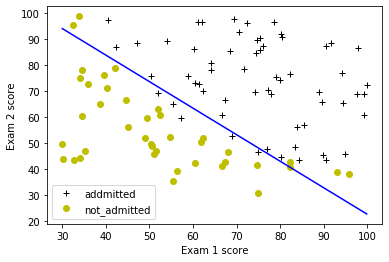

In [33]:
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-')
plt.legend()
plt.show()

计算准确率

In [34]:
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

def makePrediction(mytheta, myx):
    return h(mytheta,myx) >= 0.5

pos_correct = np.sum(makePrediction(theta,pos))
neg_correct = float(np.sum(np.invert(makePrediction(theta,neg))))
prcnt_correct = float(pos_correct+neg_correct)/m
print("Fraction of training samples correctly predicted: %f." % prcnt_correct)

Fraction of training samples correctly predicted: 0.890000.
